**Transformación de los datos**

In [103]:
#Cargamos el dataset
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/datasets_colab/AccidentesAviones.csv")

#Cambiaremos el nombre de la columna 'Ruta' por 'Location' por ser más adecuado
df = df.rename(columns={'Ruta': 'Location'})

df.head()

,id,fecha,HORA declarada,Location,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


Creamos una descripción de las columnas a tratar:
1. La columna "fecha" se refiere a la fecha del accidente
2. La columna "HORA declarada" se refiere a la hora local en la que ocurrió el accidente
3. La columna "Location" se refiere a la ubicación donde ocurrió el accidente
4. La columna "OperadOR" se refiere a Aerolínea u operador de la aeronave
5. La columna "flight_no" se refiere al número de vuelo asignado por el operador de la aeronave
6. La columna "route" se refiere a la ruta completa o parcial volada antes del accidente
7. La columna "ac_type" se refiere a Tipo de aeronave
8. La columna "registration" se refiere a la matrícula OACI de la aeronave
9. La columna "cn_ln" se refiere al Número de construcción o de serie o también al Número de línea o de fuselaje
10. La columna "all_aboard" se refiere a Total a bordo (pasajeros con tripulación)
11. La columna "PASAJEROS A BORDO" se refiere a cantidad de pasajeros a bordo
12. La columna "crew_aboard" se refiere a la tripulación a bordo
13. La columna "cantidad de fallecidos" se refiere a la cantidad total de fallecidos (personas que estaban dentro de la aeronave)
14. La columna "passenger_fatalities" se refiere a la cantidad de muertes de pasajeros
15. La columna "crew_fatalities" se refiere a la cantidad de muertes de la tripulación
16. La columna "ground" se refiere al total de muertos en tierra
17. La columna "summary" se refiere a Breve descripción del accidente y la causa si se conoce

Echando un vistazo al DataFrame, observamos varios valores perdidos de la forma " ? " :

In [104]:
print('La cantidad de valores perdidos de la forma "?" en cada columna es:')
df.eq('?').sum()

La cantidad de valores perdidos de la forma "?" en cada columna es:


id                           0
fecha                        0
HORA declarada            1504
Location                     5
OperadOR                    10
flight_no                 3682
route                      762
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

Teniendo en cuenta la cantidad de valores perdidos en cada columna y la relevancia de cada una de las columnas, procederemos a eliminar columnas que no utilizaremos en nuestro análisis:

In [105]:
#Se eliminará la columna 'id' por ser irrelevante
df = df.drop('id', axis=1)

#Se eliminará la columna 'flight_no' por ser irrelevante y tener muchos valores
#perdidos
df = df.drop('flight_no', axis=1)

#Se eliminará la columna 'route' por ser irrelevante y tener muchos valores perdidos
df = df.drop('route', axis=1)

#Se eliminará la columna 'registration' por ser irrelevante
df = df.drop('registration', axis=1)

#Se eliminará la columna 'cn_ln' por ser irrelevante y tener muchos valores perdidos
df = df.drop('cn_ln', axis=1)

#Se eliminará la columna 'PASAJEROS A BORDO' porque sus datos ya están incluidos0
#en la columna 'all_aboard'
df = df.drop('PASAJEROS A BORDO', axis=1)

#Se eliminará la columna 'crew_aboard' porque sus datos ya están incluidos en la 
#columna 'all_aboard'
df = df.drop('crew_aboard', axis=1)

#Se eliminará la columna 'passenger_fatalities' porque sus datos ya están
#incluidos en la columna 'cantidad de fallecidos'
df = df.drop('passenger_fatalities', axis=1)

#Se eliminará la columna 'crew_fatalities' porque sus datos ya están incluidos en
#la columna 'cantidad de fallecidos'
df = df.drop('crew_fatalities', axis=1)

#Se eliminará la columna 'summary' por no contar con muchos datos repetidos y 
#por no contar con valores numéricos
df = df.drop('summary', axis=1)

#Se mantendrá la columna 'ground' porque sus datos no están incluidos en ninguna
# otra columna

# A pesar de que posee muchos valores perdidos, no eliminaremos la columna 
# "HORA declarada" porque es de alta relevancia para nuestro análisis

Con las columnas restantes haremos lo siguiente: 


*    Reemplazaremos todos los valores perdidos por el valor Nan

In [106]:
# Importamos el módulo numpy para crear los valores NaN
import numpy as np

df = df.replace(['-', '?'], np.nan)

#Verificamos la cantidad de valores nulos

print('La cantidad de valores nulos en cada columna es:')

df.isnull().sum()

La cantidad de valores nulos en cada columna es:


fecha                        0
HORA declarada            1504
Location                     5
OperadOR                    10
ac_type                     13
all_aboard                  17
cantidad de fallecidos       8
ground                      44
dtype: int64

*    La columna 'HORA declarada' tiene muchos valores nulos pero la mejor decisión será mantenerlos para no perder valores que podrían afectar mucho a las otras columnas. Para las demás columnas, sí eliminaremos las filas que posean valores nulos

In [107]:
#Eliminamos las filas con valores nulos en las columnas.
df = df.dropna(subset=['Location', 'OperadOR', 'ac_type', 'all_aboard', 
                  'cantidad de fallecidos', 'ground'])

#Reasignamos los números de fila para que estén completos y ordenados:
df = df.reset_index(drop=True)

#Verificamos la eliminación de los valores nulos:
print('La cantidad de valores nulos en cada columna es:')
df.isnull().sum()

La cantidad de valores nulos en cada columna es:


fecha                        0
HORA declarada            1450
Location                     0
OperadOR                     0
ac_type                      0
all_aboard                   0
cantidad de fallecidos       0
ground                       0
dtype: int64

* Convetiremos los valores de la columna 'HORA declarada' en formato datetime.time

In [108]:
from datetime import datetime

# Creamos una función para convertir el dato con formato str en formato time
def convertir_a_hora(texto):
    if pd.isna(texto):
        return np.nan

    #Debido a que algunas horas eran del tipo ' 2:00', haremos la siguiente condicional:
      
    elif texto.startswith(' '):
      
        tiempo = datetime.strptime(texto[1:], '%H:%M')
        return tiempo.time()
    
    #Debido a que algunas horas eran del tipo 'c 13:00', haremos la siguiente condicional:

    elif texto.startswith('c'):
        try:
          tiempo = datetime.strptime(texto[2:], '%H:%M')
          return tiempo.time()

        #Y considerando también casos del tipo 'c 3:00', estableceremos:

        except ValueError:
          tiempo = datetime.strptime(texto[3:], '%H:%M')
    else:
        try:
            tiempo = datetime.strptime(texto, '%H:%M')
            return tiempo.time()
        except ValueError:
            #Consideraremos también cuando la hora está de la forma '1534'
            try:
                tiempo = datetime.strptime(texto, '%H%M')
                return tiempo.time()
            except ValueError:
                return np.nan

# Convertimos los valores de la columna 'Hora' en objetos de formato time
df['HORA declarada'] = df['HORA declarada'].apply(convertir_a_hora)


*   Convertiremos los valores restantes en formato AAAA-mm-dd para la columna 'fecha' y en formato 'int' para las columnas 'all_aboard', 'cantidad de fallecidos' y 'ground'. Los formatos de las demás columnas se mantendrán en su formato actual: 'str'

In [109]:
#Convertiremos los valores de la columna 'fecha' en formato AAA-mm-dd, para ello
#crearemos una lista vacía y mediante iteraciones la llenaremos con los valores de
#la columna 'fecha' en formato AAA-mm-dd para finalmente reemplazarla por la 
#columna original

import datetime
fecha_list=[]
for f in df['fecha']:
  f = datetime.datetime.strptime(f, "%B %d, %Y").date()
  fecha_list.append(f)
df['fecha'] = fecha_list

#Convertiremos los valores de la columna 'all_aboard' en formato int:

aboard_list=[]
for a in df['all_aboard']:
  a = int(a)
  aboard_list.append(a)
df['all_aboard'] = aboard_list

#Convertiremos los valores de la columna 'cantidad de fallecidos' en formato int:

fallecidos_list=[]
for f in df['cantidad de fallecidos']:
  f = int(f)
  fallecidos_list.append(f)

df['cantidad de fallecidos'] = fallecidos_list

#Convertiremos los valores de la columna 'ground' en formato int
ground_list=[]
for g in df['ground']:
  g = int(g)
  ground_list.append(g)

df['ground']=ground_list

Exportamos

In [111]:
df.to_csv('accidentesaviones_limpio.csv', index=False)

**Análisis Exploratorio de los datos (EDA)**

Se elaborará un reporte que incluya un resumen de estadísticas descriptivas de los datasets, análisis univariados (por ejemplo, distribución de variables numéricas), análisis bivariados (correlación entre variables numéricas y/o categóricas) y cualquier análisis que ayude al mejor entendimiento de los datos (encontrar patrones, outliers y/o anomalías, entre otros).

**ANÁLISIS UNIVARIADO**

**Gráfico de barras**

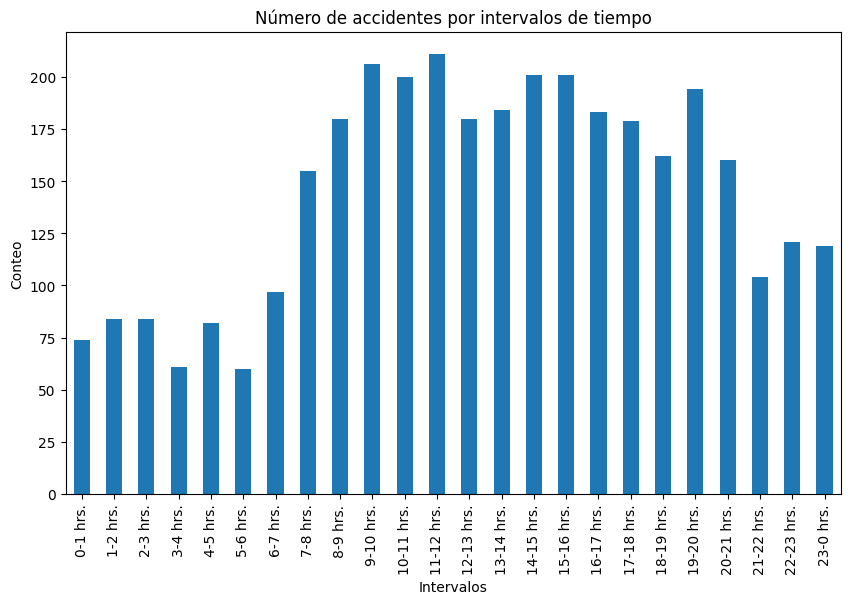

In [98]:
import matplotlib.pyplot as plt

intervalos_list = []

for h in df['HORA declarada']:
  if type(h) != float:
    h = h.hour
    intervalos_list.append(h)
  else:
    h = np.nan
    intervalos_list.append(h)

df['intervalo_horas'] = intervalos_list

conteo_horas = df['intervalo_horas'].value_counts().sort_index()

# Creamos el gráfico de barras
fig, ax = plt.subplots(figsize=(10,6))
conteo_horas.plot(kind='bar', ax=ax)

# Personalizamos el gráfico
ax.set_xlabel('Intervalos')
ax.set_ylabel('Conteo')
ax.set_title('Número de accidentes por intervalos de tiempo')

# Modificamos los ticks del eje x
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
            19, 20, 21, 22, 23], ['0-1 hrs.', '1-2 hrs.', '2-3 hrs.', '3-4 hrs.', 
                                  '4-5 hrs.', '5-6 hrs.', '6-7 hrs.', '7-8 hrs.', 
                                  '8-9 hrs.', '9-10 hrs.', '10-11 hrs.',
                                  '11-12 hrs.','12-13 hrs.', '13-14 hrs.', 
                                  '14-15 hrs.', '15-16 hrs.', '16-17 hrs.', 
                                  '17-18 hrs.', '18-19 hrs.', '19-20 hrs.', 
                                  '20-21 hrs.', '21-22 hrs.','22-23 hrs.', 
                                  '23-0 hrs.'])

#Mostramos el gráfico
plt.show()

#Eliminamos la columna creada para no ocasionar problemas en el futuro
df = df.drop('intervalo_horas', axis=1)


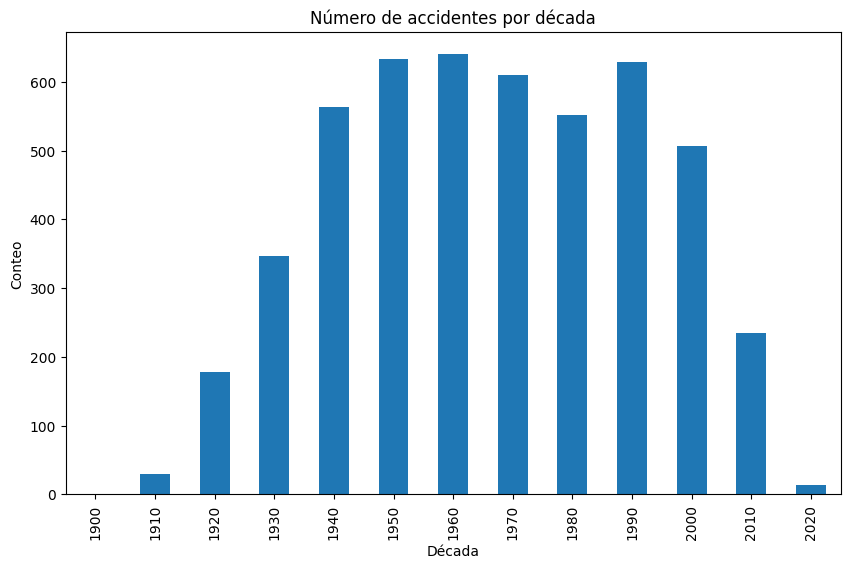

In [101]:
import matplotlib.pyplot as plt

# Convertimos la columna 'fecha' a tipo datetime si aún no lo es
df['fecha'] = pd.to_datetime(df['fecha'])

# Agrupamos por períodos de décadas
df['decada'] = df['fecha'].dt.year // 10 * 10
conteo_decadas = df['decada'].value_counts().sort_index()

# Creamos el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
conteo_decadas.plot(kind='bar', ax=ax)

# Personalizamos el gráfico
ax.set_xlabel('Década')
ax.set_ylabel('Conteo')
ax.set_title('Número de accidentes por década')


# Mostramos el gráfico
plt.show()

#Eliminamos la columna creada para evitar problemas en el futuro
df = df.drop('decada', axis = 1)